In [1]:
import sys
if "../src/" not in sys.path:
    sys.path.append("../src/")
from roplot import FieldPowerPlay, Robot, StateRecord, DeclarativeBase
from datetime import datetime
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, desc
from sqlalchemy.orm import Session

from shapely import Point

In [2]:
# SQLITE Handles concurrency well so long as there's not concurrent writes. 
# So this should work fine while monitoring since we're only reading.
fpp = FieldPowerPlay()

DATA_PATH='../src/data'
TODAY = datetime.now().strftime("%Y-%m-%d")
ENGINE = create_engine(f"sqlite:///{DATA_PATH}/{TODAY}.sqlite")

session = Session(ENGINE)
def update_position(r):
    sr = session.query(StateRecord).order_by(desc( StateRecord.id )).limit(1).first()
#     sr.record
    r.position = (sr.record['x'], sr.record['y'])
    r.heading = sr.record['heading']

# Robot Monitor and Draw cell works
If the state is being updated in a sqlite database using a `monitor.py`, the following code block draws the robot in the right place.  Next up: Figure out how to make it update easily.

In [44]:
from branca.element import Figure
import geopandas as gpd
import folium
crs = "Simple"
m2 = folium.Map(location=[72, 72], zoom_start=2, min_zoom=1, max_zoom=4, tiles=None, crs=crs)
fpp.add_to(m2, show_junctions=True)

# folium.GeoJson(gpd.GeoSeries(field).to_json()).add_to(m2)
r = Robot((17, 16))
update_position(r)
print(r.position)
m2.add_child(r, name="Robot")
m2

POINT (-13.04537795452871 17.765784630006188)


In [4]:
# With Robot as a GeoJson object, changing the robot position dynamically changes the resulting map
# without needing to re-generate the robot and put it in the map manually.
r.position = (86, 64) 
r.heading = 45
m2

# Potential solution: Make Robot a inherit from GeoJson and add it as an object directly. 
# Override the appropriate functions (hard part).

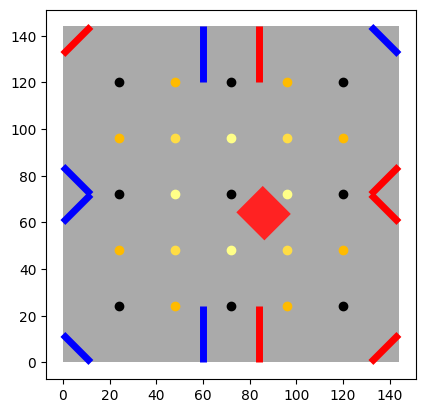

In [5]:
ax = plt.gca()
fpp.draw_on_axes(ax)
r.draw_on_axes(ax)

In [48]:
from folium import GeoJson
from typing import Callable

fig2 = Figure(width=550, height=550)
m1=folium.Map(location=[72, 72], zoom_start=1, tiles=None, crs=crs)

def style_line_color(color:str) -> Callable:
    def sf(nonsense):
        return {"color": color}
    return sf
    
for color in ("red", "blue"):
    gj = GeoJson(gpd.GeoSeries(fpp.field_lines.by_color(color)).to_json(),
                style_function=style_line_color(color))
    gj.add_to(m1)
r.add_to(m1)
# GeoJson().add_to(m2)
m1

In [7]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d")

'2023-01-12'

In [8]:
r.position = (64, 64)
r.heading = -90
m1

In [9]:
m2._children

OrderedDict([('geo_json_469bdfeb1db180ef32ef262bbb118345',
              <folium.features.GeoJson at 0x20b0adffbe0>),
             ('circle_184f1819b95db41a9548aae302f4a63b',
              <folium.vector_layers.Circle at 0x20b0ae61690>),
             ('circle_d06fa3471d8fc1871bf661934547369e',
              <folium.vector_layers.Circle at 0x20b0ae603d0>),
             ('circle_b543723ce1a6f89d0a3104401a062b45',
              <folium.vector_layers.Circle at 0x20b0ae39150>),
             ('circle_b19d0930835ee19abe8272400053586c',
              <folium.vector_layers.Circle at 0x20b0ae614e0>),
             ('circle_3f912eca0e421bcfbdb848daef15e245',
              <folium.vector_layers.Circle at 0x20b0ae616f0>),
             ('circle_03a9e80769130c7553e0bce57595e31a',
              <folium.vector_layers.Circle at 0x20b0ae38eb0>),
             ('circle_0b4560630914e05c5d12fcbe2adf4bd2',
              <folium.vector_layers.Circle at 0x20b0ae624d0>),
             ('circle_9250b59eb6e27c1055ac